# Mining - Association Rule Mining for Cardiovascular Comorbidity and Risk Factor Assessment

[description]

### Rules are assessed using the following criteria:

1. **Support:** Fraction of transactions containing the itemsets in both X and Y.
    * measures how frequently the combination appears in the data.
2. **Confidence:** Probability that transactions with X also include Y.
    * measures the reliability of the inference.
3. **Lift:** The ratio of observed support to that expected if X and Y were independent.
    * Lift > 1 implies a positive association — items occur together more than expected.
    * Lift = 1 implies independence.
    * Lift < 1 implies a negative association.

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

In [2]:
# Load preprocessed dataset
df = pd.read_csv(r'C:\Users\Admin\Documents\dataset_association_mining\heart_disease_preprocessed.csv')

print(df.head())

   HeartDisease_No  HeartDisease_Yes  BMI_cat_Underweight  BMI_cat_Normal  \
0             True             False                 True           False   
1             True             False                False            True   
2             True             False                False           False   
3             True             False                False            True   
4             True             False                False            True   

   BMI_cat_Overweight  BMI_cat_Obese  Smoking_No  Smoking_Yes  \
0               False          False       False         True   
1               False          False        True        False   
2                True          False       False         True   
3               False          False        True        False   
4               False          False        True        False   

   AlcoholDrinking_No  AlcoholDrinking_Yes  ...  GenHealth_Very good  \
0                True                False  ...                 True   
1 

In [3]:
# Convert True/False to 1/0 for Apriori
df_for_mining = df.astype(int)

print(f"Dataset shape: {df_for_mining.shape}")
print(df_for_mining.head())


Dataset shape: (319795, 61)
   HeartDisease_No  HeartDisease_Yes  BMI_cat_Underweight  BMI_cat_Normal  \
0                1                 0                    1               0   
1                1                 0                    0               1   
2                1                 0                    0               0   
3                1                 0                    0               1   
4                1                 0                    0               1   

   BMI_cat_Overweight  BMI_cat_Obese  Smoking_No  Smoking_Yes  \
0                   0              0           0            1   
1                   0              0           1            0   
2                   1              0           0            1   
3                   0              0           1            0   
4                   0              0           1            0   

   AlcoholDrinking_No  AlcoholDrinking_Yes  ...  GenHealth_Very good  \
0                   1                    0  ..

In [4]:
# Generate frequent itemsets using Apriori
freq_itemsets = fpgrowth(df_for_mining, min_support=0.1, use_colnames=True, max_len=3)

print(f"\nNumber of frequent itemsets: {len(freq_itemsets)}")
print(freq_itemsets.head(20))

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Number of frequent itemsets: 2051
     support                   itemsets
0   0.963167         (KidneyDisease_No)
1   0.962260                (Stroke_No)
2   0.931903       (AlcoholDrinking_No)
3   0.914405          (HeartDisease_No)
4   0.861130           (DiffWalking_No)
5   0.775362     (PhysicalActivity_Yes)
6   0.766779               (Race_White)
7   0.608943      (SleepTime_cat_Short)
8   0.524727               (Sex_Female)
9   0.412477              (Smoking_Yes)
10  0.356034      (GenHealth_Very good)
11  0.161278    (MentalHealth_cat_High)
12  0.134061               (Asthma_Yes)
13  0.127588             (Diabetic_Yes)
14  0.106274   (PhysicalHealth_cat_Low)
15  0.906756            (SkinCancer_No)
16  0.865939                (Asthma_No)
17  0.843206              (Diabetic_No)
18  0.708545  (PhysicalHealth_cat_None)
19  0.642290    (MentalHealth_cat_None)


In [5]:
# Filter frequent itemsets - remove trivial 1-itemsets 
freq_itemsets [
    freq_itemsets['itemsets'].apply(lambda x: len(x) > 1)
].sort_values(by='support', ascending=False).head(20)

,support,itemsets
35,0.930090,"(KidneyDisease_No, Stroke_No)"
36,0.896237,"(KidneyDisease_No, AlcoholDrinking_No)"
37,0.895780,"(Stroke_No, AlcoholDrinking_No)"
39,0.890389,"(HeartDisease_No, Stroke_No)"
40,0.888375,"(KidneyDisease_No, HeartDisease_No)"
693,0.876743,"(KidneyDisease_No, SkinCancer_No)"
696,0.875201,"(SkinCancer_No, Stroke_No)"
42,0.866530,"(KidneyDisease_No, HeartDisease_No, Stroke_No)"
38,0.864641,"(KidneyDisease_No, Stroke_No, AlcoholDrinking_No)"
41,0.849876,"(HeartDisease_No, AlcoholDrinking_No)"


In [6]:
# Generate association rules 

rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.7)

rules = rules.sort_values(by='lift', ascending=False)
rules.head(30)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3943,(GenHealth_Excellent),"(PhysicalHealth_cat_None, Diabetic_No)",0.209015,0.617105,0.176920,0.846444,1.371637,1.0,0.047935,2.493520,0.342540,0.272519,0.598960,0.566568
3976,(GenHealth_Excellent),"(PhysicalHealth_cat_None, PhysicalActivity_Yes)",0.209015,0.578361,0.164746,0.788202,1.362820,1.0,0.043860,1.990760,0.336577,0.264597,0.497679,0.536526
3937,(GenHealth_Excellent),"(PhysicalHealth_cat_None, DiffWalking_No)",0.209015,0.657856,0.182073,0.871099,1.324149,1.0,0.044571,2.654318,0.309485,0.265878,0.623255,0.573933
3940,(GenHealth_Excellent),"(HeartDisease_No, PhysicalHealth_cat_None)",0.209015,0.663447,0.181466,0.868197,1.308615,1.0,0.042796,2.553449,0.298152,0.262616,0.608373,0.570859
4022,(GenHealth_Excellent),"(MentalHealth_cat_None, Diabetic_No)",0.209015,0.540643,0.147069,0.703629,1.301467,1.0,0.034067,1.549941,0.292846,0.244062,0.354814,0.487828
3949,(GenHealth_Excellent),"(PhysicalHealth_cat_None, Asthma_No)",0.209015,0.633018,0.171144,0.818812,1.293504,1.0,0.038834,2.025416,0.286866,0.255100,0.506274,0.544587
4028,"(MentalHealth_cat_None, GenHealth_Excellent)",(PhysicalHealth_cat_None),0.154824,0.708545,0.141578,0.914445,1.290596,1.0,0.031878,3.406644,0.266411,0.196149,0.706456,0.557130
4016,(GenHealth_Excellent),"(MentalHealth_cat_None, DiffWalking_No)",0.209015,0.566372,0.151447,0.724574,1.279325,1.0,0.033067,1.574392,0.276033,0.242727,0.364834,0.495986
3952,(GenHealth_Excellent),"(PhysicalHealth_cat_None, SkinCancer_No)",0.209015,0.646045,0.172310,0.824392,1.276059,1.0,0.037277,2.015595,0.273504,0.252377,0.503869,0.545554
3931,(GenHealth_Excellent),"(KidneyDisease_No, PhysicalHealth_cat_None)",0.209015,0.691543,0.183918,0.879926,1.272409,1.0,0.039375,2.568886,0.270662,0.256639,0.610726,0.572939


In [7]:
# Keep only strong rules with lift >= 1.2
strong_rules = rules[rules['lift'] >= 1.2]

# Display top 10 strong rules
strong_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3943,(GenHealth_Excellent),"(PhysicalHealth_cat_None, Diabetic_No)",0.209015,0.617105,0.176920,0.846444,1.371637,1.0,0.047935,2.493520,0.342540,0.272519,0.598960,0.566568
3976,(GenHealth_Excellent),"(PhysicalHealth_cat_None, PhysicalActivity_Yes)",0.209015,0.578361,0.164746,0.788202,1.362820,1.0,0.043860,1.990760,0.336577,0.264597,0.497679,0.536526
3937,(GenHealth_Excellent),"(PhysicalHealth_cat_None, DiffWalking_No)",0.209015,0.657856,0.182073,0.871099,1.324149,1.0,0.044571,2.654318,0.309485,0.265878,0.623255,0.573933
3940,(GenHealth_Excellent),"(HeartDisease_No, PhysicalHealth_cat_None)",0.209015,0.663447,0.181466,0.868197,1.308615,1.0,0.042796,2.553449,0.298152,0.262616,0.608373,0.570859
4022,(GenHealth_Excellent),"(MentalHealth_cat_None, Diabetic_No)",0.209015,0.540643,0.147069,0.703629,1.301467,1.0,0.034067,1.549941,0.292846,0.244062,0.354814,0.487828
3949,(GenHealth_Excellent),"(PhysicalHealth_cat_None, Asthma_No)",0.209015,0.633018,0.171144,0.818812,1.293504,1.0,0.038834,2.025416,0.286866,0.255100,0.506274,0.544587
4028,"(MentalHealth_cat_None, GenHealth_Excellent)",(PhysicalHealth_cat_None),0.154824,0.708545,0.141578,0.914445,1.290596,1.0,0.031878,3.406644,0.266411,0.196149,0.706456,0.557130
4016,(GenHealth_Excellent),"(MentalHealth_cat_None, DiffWalking_No)",0.209015,0.566372,0.151447,0.724574,1.279325,1.0,0.033067,1.574392,0.276033,0.242727,0.364834,0.495986
3952,(GenHealth_Excellent),"(PhysicalHealth_cat_None, SkinCancer_No)",0.209015,0.646045,0.172310,0.824392,1.276059,1.0,0.037277,2.015595,0.273504,0.252377,0.503869,0.545554
3931,(GenHealth_Excellent),"(KidneyDisease_No, PhysicalHealth_cat_None)",0.209015,0.691543,0.183918,0.879926,1.272409,1.0,0.039375,2.568886,0.270662,0.256639,0.610726,0.572939


In [8]:
# Check rules that highlight risk factors for heart disease

risk_rules = rules[
    rules['consequents'].astype(str).str.contains('Yes')
]

risk_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3976,(GenHealth_Excellent),"(PhysicalHealth_cat_None, PhysicalActivity_Yes)",0.209015,0.578361,0.164746,0.788202,1.362820,1.0,0.043860,1.990760,0.336577,0.264597,0.497679,0.536526
3967,(GenHealth_Excellent),"(Diabetic_No, PhysicalActivity_Yes)",0.209015,0.674345,0.177373,0.848613,1.258427,1.0,0.036425,2.151148,0.259622,0.251241,0.535132,0.555822
3961,(GenHealth_Excellent),"(DiffWalking_No, PhysicalActivity_Yes)",0.209015,0.707885,0.182392,0.872625,1.232722,1.0,0.034433,2.293348,0.238673,0.248318,0.563956,0.565141
3964,(GenHealth_Excellent),"(HeartDisease_No, PhysicalActivity_Yes)",0.209015,0.720674,0.181410,0.867927,1.204327,1.0,0.030778,2.114941,0.214493,0.242436,0.527173,0.559825
3973,(GenHealth_Excellent),"(Asthma_No, PhysicalActivity_Yes)",0.209015,0.677321,0.170159,0.814099,1.201939,1.0,0.028589,1.735754,0.212407,0.237593,0.423882,0.532661
4001,"(Race_White, GenHealth_Excellent)",(PhysicalActivity_Yes),0.161138,0.775362,0.146237,0.907531,1.170461,1.0,0.021297,2.429340,0.173611,0.185049,0.588365,0.548068
3979,(GenHealth_Excellent),"(SkinCancer_No, PhysicalActivity_Yes)",0.209015,0.703226,0.171701,0.821475,1.168152,1.0,0.024716,1.662365,0.181985,0.231859,0.398447,0.532818
3955,(GenHealth_Excellent),"(KidneyDisease_No, PhysicalActivity_Yes)",0.209015,0.753236,0.183830,0.879507,1.167638,1.0,0.026393,2.047954,0.181509,0.236158,0.511708,0.561781
3958,(GenHealth_Excellent),"(Stroke_No, PhysicalActivity_Yes)",0.209015,0.752420,0.183568,0.878250,1.167235,1.0,0.026301,2.033519,0.181134,0.235988,0.508242,0.561110
4048,"(GenHealth_Excellent, Smoking_No)",(PhysicalActivity_Yes),0.146309,0.775362,0.131537,0.899036,1.159504,1.0,0.018095,2.224930,0.161139,0.166475,0.550548,0.534341


In [9]:
df_for_mining[['Race_White','Race_Black','Race_Asian','Race_Other']].sum()


Race_White    245212
Race_Black     22939
Race_Asian      8068
Race_Other     16130
dtype: int64

### Save Rules in CSV file format

In [13]:
# Keep only useful columns

rules_clean = rules[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']
].sort_values(by='lift', ascending=False)

rules_clean.head()

# Convert frozensets to strings
rules_clean['antecedents'] = rules_clean['antecedents'].apply(
    lambda x: ', '.join(list(x))
)
rules_clean['consequents'] = rules_clean['consequents'].apply(
    lambda x: ', '.join(list(x))
)

# Save association rules to CSV
rules_clean.to_csv(r'C:\Users\Admin\Documents\dataset_association_mining\results.csv', index=False)

print("Association rules saved successfully!")
print(rules_clean.shape)

# Save frequent itemsets to CSV
freq_itemsets.to_csv(r'C:\Users\Admin\Documents\dataset_association_mining\freq_itemsets.csv', index=False)

print("Frequent itemsets saved successfully!")
print(freq_itemsets.shape)


Association rules saved successfully!
(4089, 5)
Frequent itemsets saved successfully!
(2051, 2)


### Analysis / Visualisations of Rule Metrics

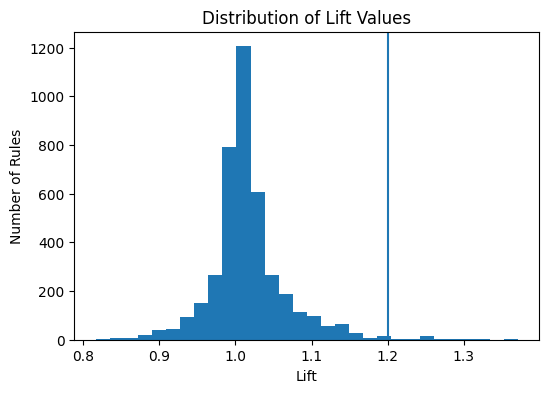

In [14]:
# Lift Distribution Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(rules["lift"], bins=30)
plt.axvline(1.2)
plt.title("Distribution of Lift Values")
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.show()


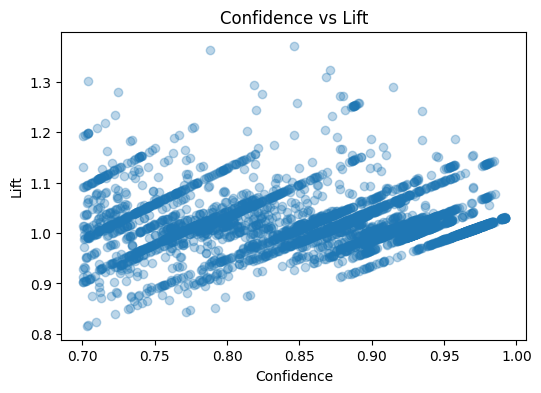

In [15]:
# Confidence vs Lift Scatter Plot

plt.figure(figsize=(6,4))
plt.scatter(rules["confidence"], rules["lift"], alpha=0.3)
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Confidence vs Lift")
plt.show()


### Comparison Table

| Setting | Min Support | Min Confidence | # Frequent Itemsets | # Rules | Runtime                   |
| ------- | ----------- | -------------- | ------------------- | ------- | ------------------------- |
| Run 1   | 0.10        | 0.70           | 2051                | (fill)  | ~87 min                   |
| Run 2   | 0.05        | 0.70           | —                   | —       | >100 min (did not finish) |
